# Problem 1

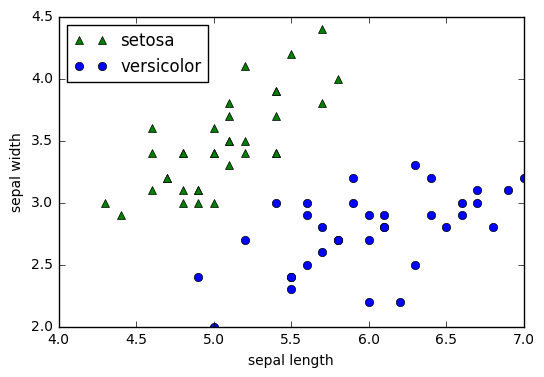

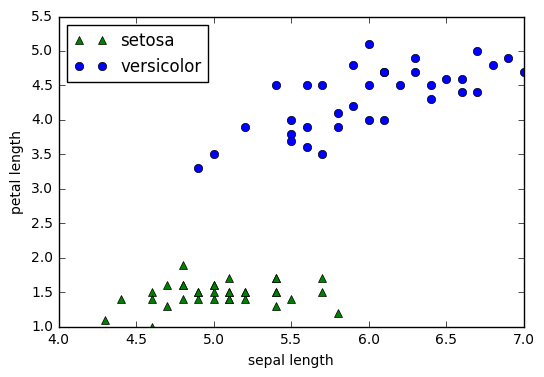

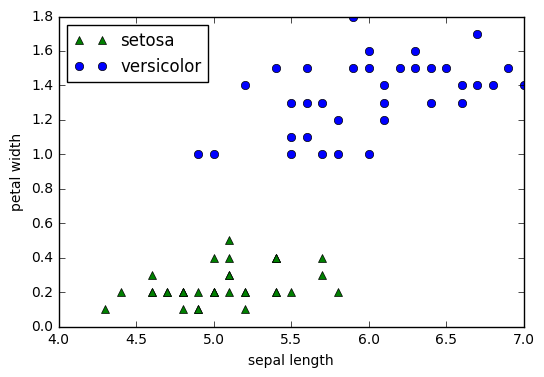

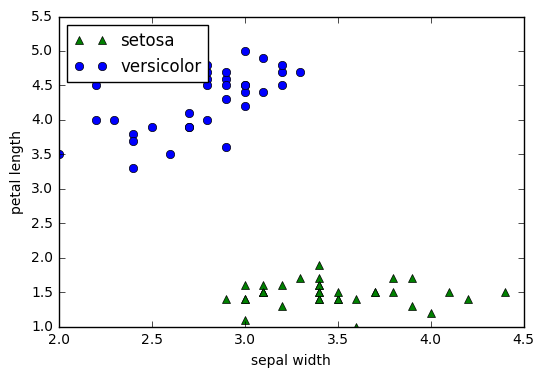

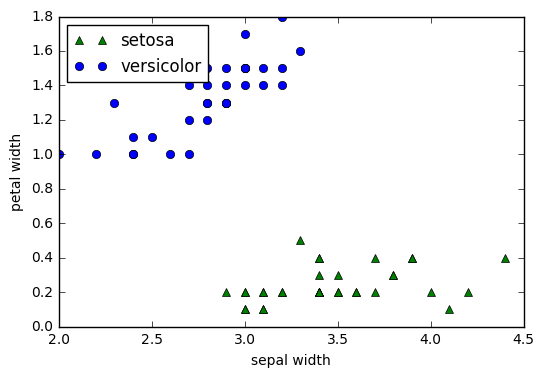

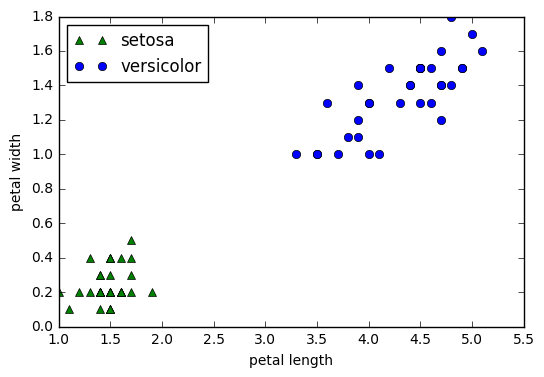

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

train = []
train_labels = []
train_both = []
file = open('iris/iris_train.data', 'r') 
for line in file: 
    l = line.rstrip('\n').split(',')
    
    nums = [float(x) for x in l[:4]]
    train_labels.append(l[-1])
    nums.append(l[-1])
    train_both.append(nums)
    train.append(nums[0:-1])
    
    
test = []
test_labels = []
test_both = []
file = open('iris/iris_test.data', 'r') 
for line in file: 
    l = line.rstrip('\n').split(',')
    
    nums = [float(x) for x in l[:4]]
    test_labels.append(l[-1])
    nums.append(l[-1])
    test_both.append(nums)
    test.append(nums[0:-1])

test = np.array(test)
test_labels = np.array(test_labels)
test_both = np.array(test_both)
#print train_both
#print train
train = np.array(train)
train_labels = np.array(train_labels)

train, train_labels = shuffle(train, train_labels, random_state=0)

unique_labels = np.unique(train_labels)



sepal_length_setosa = [x[0] for x in train_both if x[-1] == unique_labels[0]]
sepal_width_setosa = [x[1] for x in train_both if x[-1] == unique_labels[0]]
petal_length_setosa = [x[2] for x in train_both if x[-1] == unique_labels[0]]
petal_width_setosa = [x[3] for x in train_both if x[-1] == unique_labels[0]]

sepal_length_versicolor = [x[0] for x in train_both if x[-1] == unique_labels[1]]
sepal_width_versicolor = [x[1] for x in train_both if x[-1] == unique_labels[1]]
petal_length_versicolor = [x[2] for x in train_both if x[-1] == unique_labels[1]]
petal_width_versicolor = [x[3] for x in train_both if x[-1] == unique_labels[1]]


plt.plot(sepal_length_setosa, sepal_width_setosa, 'g^',label='setosa')
plt.plot(sepal_length_versicolor, sepal_width_versicolor, 'bo',label='versicolor')
plt.legend(loc='upper left')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

plt.plot(sepal_length_setosa, petal_length_setosa, 'g^',label='setosa')
plt.plot(sepal_length_versicolor, petal_length_versicolor, 'bo',label='versicolor')
plt.legend(loc='upper left')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.show()

plt.plot(sepal_length_setosa, petal_width_setosa, 'g^',label='setosa')
plt.plot(sepal_length_versicolor, petal_width_versicolor, 'bo',label='versicolor')
plt.legend(loc='upper left')
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.show()

plt.plot(sepal_width_setosa, petal_length_setosa, 'g^',label='setosa')
plt.plot(sepal_width_versicolor, petal_length_versicolor, 'bo',label='versicolor')
plt.legend(loc='upper left')
plt.xlabel('sepal width')
plt.ylabel('petal length')
plt.show()

plt.plot(sepal_width_setosa, petal_width_setosa, 'g^',label='setosa')
plt.plot(sepal_width_versicolor, petal_width_versicolor, 'bo',label='versicolor')
plt.legend(loc='upper left')
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.show()

plt.plot(petal_length_setosa, petal_width_setosa, 'g^',label='setosa')
plt.plot(petal_length_versicolor, petal_width_versicolor, 'bo',label='versicolor')
plt.legend(loc='upper left')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()







In [2]:


def perceptronAccuracy(data, labels, weights):

    missed = 0

    testWithBias = np.append(np.ones((len(data),1)),data,axis=1)

    for sample,label in zip(testWithBias,labels): 
        predicted = int(np.dot(sample,weights) >= 0)
        
    
        if predicted != label: 
            missed = missed + 1

    correct = len(labels) - missed 
    accuracy = 1.0 * correct / len(labels)
    print "Perceptron classifiction accuracy = ",accuracy * 100,"%"






def trainPerceptron(learn_rate, data, labels): 
    weights = np.array([0.0 for x in range(data.shape[1]+1)])
    errors = 1
    iterations = 0
    
    trainWithBias = np.append(np.ones((len(data),1)),data,axis=1)
    
    while errors: 
        errors = 0
        iterations = iterations + 1 

        for sample,label in zip(trainWithBias,labels): 

            predicted = int(np.dot(sample,weights) >= 0)

            error = label - predicted

            if error != 0: 
                errors = errors + 1

            weights = weights + (learn_rate * error * sample)
            
    print "Number of iterations till convergence = ",iterations 
    return weights 
    
    
    
learning_rate = 0.1

train_labels_perceptron = np.array([0 if x == unique_labels[0] else 1 for x in train_labels])
test_labels_perceptron = np.array([0 if x == unique_labels[0] else 1 for x in test_labels])

w = trainPerceptron(learning_rate, train, train_labels_perceptron)        
perceptronAccuracy(test, test_labels_perceptron, w)

    


Number of iterations till convergence =  2
Perceptron classifiction accuracy =  100.0 %


In [3]:
# Z-score the training and test data 

trainZScored = np.copy(train)
testZScored = np.copy(test)

for i in range(train.shape[1]): 
    m = np.mean(train[:,i])
    s = np.std(train[:,i])
    
    for x in range(len(trainZScored[:,i])):
        
        trainZScored[x,i] = (trainZScored[x,i] - m) / s

    for x in range(len(testZScored[:,i])): 
        testZScored[x,i] = (testZScored[x,i] - m) / s
        
        
        
learning_rate = 0.1

wZScored = trainPerceptron(learning_rate, trainZScored, train_labels_perceptron)        
perceptronAccuracy(testZScored, test_labels_perceptron, wZScored)

    
    
    

Number of iterations till convergence =  2
Perceptron classifiction accuracy =  96.6666666667 %


# Problem 2

In [228]:


class FeedForwardNeuralNetwork: 
    def __init__(self, size_input, size_hidden, size_output):
        
        self.input_size = size_input
        self.hidden_size = size_hidden
        self.output_size = size_output
        
        self.hidden_weight = np.random.randn(self.input_size, self.hidden_size)
        self.output_weight = np.random.randn(self.hidden_size, self.output_size)
        
        self.hidden_bias = np.random.randn(1,self.hidden_size) 
        self.output_bias = np.random.randn(1,self.output_size)
        
    def feed_forward(self, input): 
        
        self.current_inputs = input
        
        # calculate hidden output -> output = (Inputs * weights) + biases
        # apply activation function -> hidden activation = sigmoid(output)
        
        # (1,5)
        self.hidden_activations = self.sigmoid(np.dot(input,self.hidden_weight) + self.hidden_bias)
        
        
        # calculate output output -> output = (hidden activations * weights) + biases
        # apply activation function -> output activation = sigmoid(output)
        self.output_activations = self.sigmoid(np.dot(self.hidden_activations,self.output_weight) + self.output_bias)
        
        return self.output_activations 
        
    # alpha = Learning rate 
    def backpropagation(self, output, alpha):
        target = output
        
        #(1,10)
        output_delta = (self.output_activations - target) * self.derivative_sigmoid(self.output_activations)
        
        #(1,5)
        hidden_delta = (np.dot(output_delta,self.output_weight.T)) * self.derivative_sigmoid(self.hidden_activations)
        
        #(1,784) 
        hidden_gradient = np.dot(self.current_inputs.T,hidden_delta)
        
        # (1,5)(1,10)
        output_gradient = np.dot(self.hidden_activations.T, output_delta)
        
        output_bias_gradient = output_delta
        hidden_bias_gradient = hidden_delta
        
        self.output_weight = self.output_weight + (-1 * alpha * output_gradient)
        self.hidden_weight = self.hidden_weight + (-1 * alpha * hidden_gradient)
        
        self.output_bias = self.output_bias + (-1 * alpha * output_bias_gradient)
        self.hidden_bias = self.hidden_bias + (-1 * alpha * hidden_bias_gradient)
    
    def predict(self,input): 
        
        predictions = []
        for i in input: 
            predictions.append(self.feed_forward(i))
        return np.array(predictions)
            
    def train(self, training_samples, training_labels, test_samples, test_labels, alpha, epochs):
        
        iterations = 0
        for i in range(epochs): 
            
            for input,label in zip(training_samples, training_labels): 
                self.feed_forward(input)
                self.backpropagation(label, alpha)
                iterations = iterations + 1
            
        
            #predictions = np.argmax(np.asarray(self.predict(training_samples)), axis=1)
           
            targets = np.argmax(np.asarray(training_labels), axis=1)
            predictions = self.predict(training_samples)
            
            
            errors = 0
            for target,predicted in zip(targets,predictions): 
                predicted = np.argmax(np.asarray(predicted), axis=1)
                if target != predicted: 
                    errors = errors + 1
            error_rate = 1.0 * errors / len(training_labels)
            
            print iterations,' iterations, training error rate = ',error_rate
                
    def sigmoid(self, t):
        return 1.0/(1.0+np.exp(-t))

    def derivative_sigmoid(self, t): 
        return t * (1.0 - t)

In [232]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

training_samples = []
training_labels = []
for input,label in training_data: 
    training_samples.append(input)
    training_labels.append(label)
    
test_samples = []
test_labels = []

for input,label in test_data: 
    test_samples.append(input)
    test_labels.append(label)
    
training_samples = np.array(training_samples).reshape((50000,1,784))
training_labels = np.array(training_labels).reshape((50000,10))
test_samples = np.array(test_samples).reshape((10000,1,784))
test_labels = np.array(test_labels)

ffnet = FeedForwardNeuralNetwork(784, 20, 10)
ffnet.train(training_samples,training_labels,test_samples,test_labels,0.1,100)

50000  iterations, training error rate =  0.13782
100000  iterations, training error rate =  0.10362
150000  iterations, training error rate =  0.09108
200000  iterations, training error rate =  0.08414
250000  iterations, training error rate =  0.07864
300000  iterations, training error rate =  0.07396
350000  iterations, training error rate =  0.07036
400000  iterations, training error rate =  0.06778
450000  iterations, training error rate =  0.06492
500000  iterations, training error rate =  0.0629
550000  iterations, training error rate =  0.06162
600000  iterations, training error rate =  0.06048
650000  iterations, training error rate =  0.05888
700000  iterations, training error rate =  0.05824
750000  iterations, training error rate =  0.05768
800000  iterations, training error rate =  0.05698
850000  iterations, training error rate =  0.05638
900000  iterations, training error rate =  0.05452
950000  iterations, training error rate =  0.0533
1000000  iterations, training erro

KeyboardInterrupt: 

In [220]:
print np.argmax(np.asarray([[ 0.2095066 ,  0.08202352 , 0.13316099 , 0.17794437,  0.13560912,  0.03735853,
   0.06799137  ,0.18426438 , 0.30108155,  0.11288477]]), axis=1)

[8]


In [187]:
print training_samples[0:2]
print test_labels.shape

a = [[1,2,3],[1,2,3]]
a = np.array(a)
print a.shape


[[[ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]]]
(10000L,)
(2L, 3L)
